In [ ]:
#Import libraries and define matplotlib configs
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit


#Lattice visualization color map
cmap = plt.cm.get_cmap("hsv")
cmap.set_under(color='white')  


<ipython-input-8-ab7ed384672a>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("hsv")


## Find clusters in a lattice

In [ ]:
def find_cluster(lattice):
  '''
  Find clusters and important metrics in a given lattice
  n_cluster = number of different clusters,
  size_cluster = sizes of all clusters,
  tag_cluster = tags of all clusters,
  map_cluster = Lattice with clusters tagged
  '''
  N = len(lattice)

  dx, dy = np.array([-1, 0, 1, 0]), np.array([0,-1,0,1])

  size_cluster = np.zeros(int(N*N/2), dtype= 'int')
  tag_cluster = np.zeros(int(N*N/2), dtype= 'int')
  map_cluster = np.zeros([N+2, N+2], dtype= 'int')
  
  map_cluster[1:N+1, 1:N+1] = lattice[:,:]
  n_cluster, iic = 0, 100

  for j in range(1, N+1):
      for k in range(1, N+1):
          size, add_to_size = 0,0

          if map_cluster[j,k] == 1:
              map_cluster[j,k] = iic;
              size += 1
              add_to_size += 1

              while(add_to_size > 0):
                  add_to_size =  0
                  j1, j2 = j, min(N, j+size)
                  k1, k2 = max(1, k-size), min(N, k+size)

                  for jj in range(j1, j2+1):
                      for kk in range(k1, k2+1):
                          if map_cluster[jj,kk] ==1:
                              if iic in map_cluster[jj+dx[:], kk+dy[:]]:
                                  map_cluster[jj, kk] = iic
                                  size += 1
                                  add_to_size += 1
              size_cluster[n_cluster] = size
              tag_cluster[n_cluster] = iic
              # print("cluster tag {:3n}, size {:2n}.".format(iic, size))
              iic=np.random.randint(10, 250+1)
              n_cluster += 1
  
  
  return n_cluster,size_cluster,tag_cluster,map_cluster

# Create Lattice


In [ ]:
def create_lattice(p, n):
  '''
  Create lattice with n sides and p proabibillity of ocupation.
  '''
  np.random.seed()

  lattice=np.zeros([n,n],dtype='int')

  for i in range(0,n): 
      for j in range(0,n):
          if np.random.uniform() < p:
              lattice[i,j]=1

  return lattice

## Create percolated lattice

In [ ]:
def create_percolated_lattice(p, n):
  '''create lattice and find percolation clusters'''

  lattice=create_lattice(p, n)

  n_cluster, size_cluster, tag_cluster, map_cluster = find_cluster(lattice)

  # Find bigger lattice size
  biggest_cluster_tag = tag_cluster[np.where(size_cluster == np.amax(size_cluster))]
  biggest_cluster_size = np.count_nonzero(map_cluster == biggest_cluster_tag) 

  return n_cluster, size_cluster, tag_cluster, map_cluster, biggest_cluster_size, biggest_cluster_tag

# Plot percolated lattice


n_cluster: 
 124

size_cluster: 
 [ 11 178 893 ...   0   0   0]

tag_cluster: 
 [100  87 128 ...   0   0   0]

map_cluster: 
 [[  0   0   0 ...   0   0   0]
 [  0 100 100 ...  57  57   0]
 [  0 100 100 ...  57  57   0]
 ...
 [  0   0   0 ... 191   0   0]
 [  0   0 116 ... 191 191   0]
 [  0   0   0 ...   0   0   0]]

bigger cluster size: 893
bigger cluster tag: [128]


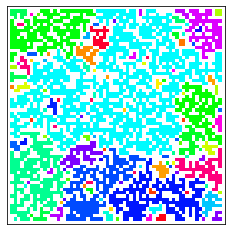

In [ ]:
def plot_percolation(p, n):
  '''plot percolation lattice and print important measurements'''

  lattice=create_lattice(p, n)

  n_cluster, size_cluster, tag_cluster, map_cluster = find_cluster(lattice)
  cmap.set_over(color=(0.188, 0.247, 0.623))
  im = plt.imshow(map_cluster, cmap=cmap, interpolation="nearest", vmin=0.99)
  im.axes.get_xaxis().set_visible(False)
  im.axes.get_yaxis().set_visible(False)

  # Find bigger lattice size
  biggest_cluster_tag = tag_cluster[np.where(size_cluster == np.amax(size_cluster))]
  biggest_cluster_size = np.count_nonzero(map_cluster == biggest_cluster_tag) 

  print()
  print("n_cluster: \n", n_cluster)
  print()
  print("size_cluster: \n", size_cluster)
  print()
  print("tag_cluster: \n", tag_cluster)
  print()
  print("map_cluster: \n", map_cluster)
  print()
  print("bigger cluster size:", biggest_cluster_size)
  print("bigger cluster tag:", biggest_cluster_tag)

  return n_cluster, size_cluster, tag_cluster, map_cluster

n_cluster, size_cluster, tag_cluster, map_cluster = plot_percolation(0.59, 64)

## Graph how biggest cluster sizes varies according to lattice fill probability 

In [ ]:
def find_biggest_cluster_size(p, n):
  '''Find bigger cluster size'''

  mean_biggest_cluster_size = 0
  standart_deviation = 0
  biggest_clusters = []

  for _ in range(10):
      
    _, size_cluster, _, _, _, _ = create_percolated_lattice(p, n)

    biggest_cluster = np.amax(size_cluster)
    biggest_clusters.append(biggest_cluster)

  mean_biggest_cluster_size = np.mean(biggest_clusters)
  standart_deviation = np.std(biggest_clusters)
      
  return mean_biggest_cluster_size, standart_deviation

In [ ]:
def graph_percolation_sizes(n):
  '''
  Graph how the biggest cluster size varies accordingly to lattice fill probability (p)
  Require find_biggest_cluster_size
  '''
  
  probability_list = [p / 20 for p in range(21)]

  cluster_sizes, standart_deviations = zip(*[find_biggest_cluster_size(p, n) for p in probability_list])

  #Linear Reference
  plt.plot(probability_list, [p*100 for p in probability_list], '--')

  # Percolation sizes with standart deviation
  plt.errorbar(probability_list, cluster_sizes, yerr=standart_deviations, fmt='ro')  
  plt.yscale('log')
  
  plt.ylabel('Size')
  plt.xlabel('Fill Probability')
  plt.title('Fill Probability x Size')
  plt.show()

graph_percolation_sizes(128)

<ipython-input-4-85abb6489e59>:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  biggest_cluster_size = np.count_nonzero(map_cluster == biggest_cluster_tag)


KeyboardInterrupt: ignored

## Graph how biggest cluster sizes varies according to lattice fill probability normalized by the total number of occupied nodes


In [ ]:
def find_percolation_sizes_normalized(p, n):
  '''Graph how biggest cluster sizes varies according to lattice fill probability. Graph normalized by the total number of occupied nodes'''

  mean_biggest_cluster_size = 0
  biggest_clusters = []

  for _ in range(10):

    _, size_cluster, _, _, _, _ = create_percolated_lattice(p, n)

    biggest_cluster = np.amax(size_cluster) / (p * n * n)
    biggest_clusters.append(biggest_cluster)
  
  mean_biggest_cluster_size = np.mean(biggest_clusters)
  standart_deviation = np.std(biggest_clusters)

  return mean_biggest_cluster_size, standart_deviation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


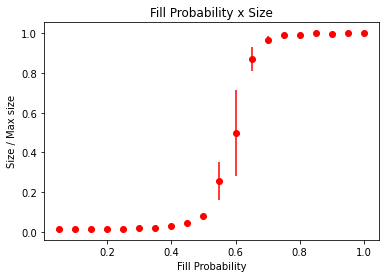

In [ ]:
def graph_percolation_sizes_normalized(n):
  '''Graph how the biggest cluster size varies accordingly to lattice fill probability (p)'''
  
  probability_list = [p / 20 for p in range(1, 21)]

  lattice_sizes, standart_deviations = zip(*[find_percolation_sizes_normalized(p, n) for p in probability_list])

  # Percolation sizes with standart deviation
  plt.errorbar(probability_list, lattice_sizes, yerr=standart_deviations, fmt='ro')
    
  plt.ylabel('Size / Max size')
  plt.xlabel('Fill Probability')
  plt.title('Fill Probability x Size')
  plt.show()

graph_percolation_sizes_normalized(64)

## Probability density function of a percolation

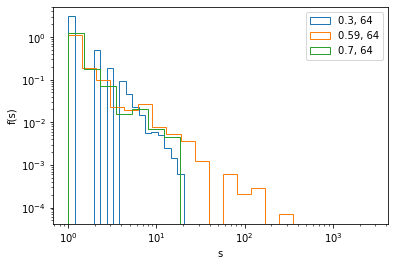

In [ ]:
import numpy as np

def find_pdf(p, n):

  _, size_cluster, _, _, _, _ = create_percolated_lattice(p, n)

  listY = np.logspace( np.log10(1), np.log10(max(size_cluster)), 20)

  plt.hist(size_cluster, bins = listY, density = True, histtype = 'step', label= f"{p}, {n}")
  
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('s')
  plt.ylabel('f(s)')
  plt.legend()

N = 64

find_pdf(0.3, N)
find_pdf(0.59, N)
find_pdf(0.7, N);

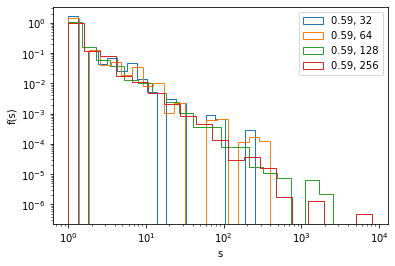

In [ ]:
find_pdf(0.59, 32)
find_pdf(0.59, 64)
find_pdf(0.59, 128)
find_pdf(0.59, 256)

# Exercises

## 1-

Yes, the biggest cluster fills aproximately half of the lattice, its linear size in ~N and adding nodes to it doesn't seem to make much difference.

## 2-
Lattice size = 50

This mathematical task is to show that in the regime of
small p, the largest cluster on a 1-D lattice grows
linearly with p;

In [ ]:
def find_biggest_1d_cluster(lattice):
  # print(lattice)

  biggest_size = 0
  current_size = 0

  for i in range(len(lattice)):
    
    if lattice[i] == 1:
      current_size += 1
    else:
      if current_size > biggest_size:
        biggest_size = current_size
      current_size = 0

  if current_size > biggest_size:
        biggest_size = current_size
  
  return biggest_size
  
def average_biggest_1d_clusters(p, n):

  average_biggest_cluster = 0
  occupied_nodes = 0

  for _ in range(10):

    #Creating Lattice
    lattice=np.zeros([n],dtype='int')
    for i in range(n):
      if np.random.uniform() < p:
          lattice[i]=1
    
    # Average information
    average_biggest_cluster += find_biggest_1d_cluster(lattice) / 10
    occupied_nodes += np.count_nonzero(lattice) / 10
  

  return average_biggest_cluster, occupied_nodes

def regular_biggest_1d_clusters(p, n):
  lattice=np.zeros([n],dtype='int')

  for i in range(n):
    if np.random.uniform() < p:
        lattice[i]=1

  return find_biggest_1d_cluster(lattice)


def task_2():
  probability_list = [p / 40 for p in range(1, 41)]

  plt.plot(probability_list, [average_biggest_1d_clusters(p, 50)[0] for p in probability_list], 'blue', label="averaged")
  # plt.plot(probability_list, [regular_biggest_1d_clusters(p, 50) for p in probability_list], 'red', label="crude")
  plt.title("1D cluster - Probability x Size")
  plt.xlabel('p')
  plt.ylabel('s')
  plt.legend()
  plt.show()

# task_2()

## 3-

Construct a series of 1-D percolation lattices of length
N = 128, with occupation probability ranging from
p = 0.1 to p = 0.9 in steps of 0.1, like in figure 4.1.
For each value of p, construct 10 such lattices, each
using a different seed for the random number generator
controlling the loading of the lattice (see section 4.2
4.7. Exercises and Explorations 103
and appendix C). Now, for each p value, determine the
mean number of occupied nodes, as averaged over the
10 realizations of the lattice, and compare it to the
expected value p N. Then, calculate the mean size of
the largest cluster S for each p, again averaged over
your 10 lattice realizations, and plot this mean value as
a function of p. Identify the value of p at which the
growth process switches from single-node addition to
cluster fusion.


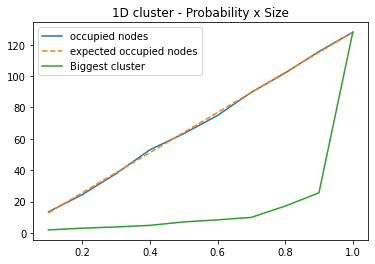

In [ ]:
def task_3():
  probability_list = [p / 10 for p in range(1, 11)]

  plt.plot(probability_list, [average_biggest_1d_clusters(p, 128)[1] for p in probability_list], label="occupied nodes")
  plt.plot(probability_list, [p*128 for p in probability_list], '--',label="expected occupied nodes")
  plt.plot(probability_list, [average_biggest_1d_clusters(p, 128)[0] for p in probability_list], label="Biggest cluster")


  plt.title("1D cluster - Probability x Size")
  plt.legend()
  plt.show()

task_3()

## 5-
Generate a 10-member ensemble of 64 × 64 2-D
Cartesian percolation lattices at p = 0.59, and build
the cluster-size PDF for this data set, using
logarithmically constant bin sizes, as described in
appendix B.5. Estimate the power-law index by a linear
least-squares fit to the logarithm of bin count versus
logarithm of size. Now estimate the power-law index
(and associated standard error) using the maximum
likelihood estimator described in appendix B.6. How
well do the two values compare?



$b*x^a + c$


Line fit params and cov: 
6.129394214745407e-06
[-1.66090577 -0.79062659]
[6.12939421e-06 2.27274915e-03]
[-4.2322457521892787e-07, -6.155616482372839e-07, -5.224100980555368e-07, -3.7514595416926477e-07, -2.480123366677134e-07, -1.560414557722628e-07, -9.498845067370393e-08, -5.6475146391864184e-08, -3.298803218998794e-08, -1.9005217427375473e-08, -1.0829305404128596e-08, -6.11516843789634e-09, -3.4272688890178964e-09, -1.908629095109728e-09, -1.0571165063645062e-09, -5.827304717561375e-10, -3.198988593028476e-10, -1.7497220952701067e-10, -9.53922407593953e-11]


AttributeError: ignored

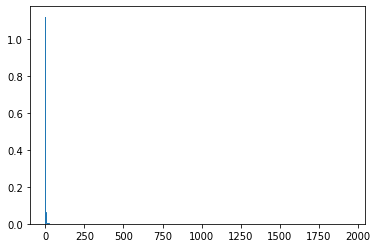

In [14]:
from collections import Counter

def task5():

  ensembled_lattice = []

  for _ in range(11):
    _, size_cluster, _, _, _, _ = create_percolated_lattice(0.59, 64)

    ensembled_lattice = np.concatenate((ensembled_lattice, size_cluster))
  

  bins_points = np.logspace( np.log10(1), np.log10(max(ensembled_lattice)), 20)
  count, size, _ = plt.hist(ensembled_lattice, bins = bins_points, density = True ,  histtype = 'step')

  xaxis = [(size[i] + size[i + 1]) / 2 for i in range(len(size) - 1)]
 
  def f(x, k, a):
    return x * k + a

  param, cov = curve_fit(f, np.log(xaxis), np.log(count))
  line_fit = [np.exp(f(i, *param)) for i in np.log(xaxis)]
  line_fit_error = [np.exp(f(i, param[0] + np.diag(cov)[0] ** 2, param[1])) for i in np.log(xaxis)]
  line_fit_error2 = [np.exp(f(i, param[0] - np.diag(cov)[0] ** 2, param[1])) for i in np.log(xaxis)]
  print("Line fit params and cov: ")
  print(np.diag(cov)[0] ** 2 )
  print(param)
  print(np.diag(cov) ** 2)
  
  new_line = [line_fit[i] - line_fit_error[i] for i in range(len(line_fit))]
  print(new_line)

  # Square Fit
  plt.plot(xaxis, line_fit, yerr = new_line, label = "square fit")
  plt.plot(xaxis, line_fit_error, label = "sqrt + error", color='red')
  plt.plot(xaxis, line_fit_error2, label = "sqrt - error", color='red')

  # Maximum Likelihood Estimator
  xlist = xaxis[5:]
  a = 1 + (len(xlist)) / sum([np.log(xn / xlist[0]) for xn in xlist]) 
  print("a: ", a)

  sigma =  (a - 1) / np.sqrt(len(xlist))

  plt.plot(xaxis, [x**(-a) for x in xaxis], label = "max likelihood")
  plt.plot(xaxis, [x**(-a + sigma) for x in xaxis], label = "lkh positive error", color='red')
  plt.plot(xaxis, [x**(-a - sigma) for x in xaxis], label = "lkh negative error", color='red')

  # Reference
  plt.plot(xaxis, [10 * i ** -1.75 for i in xaxis], '--', label = "reference")

  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('s')
  plt.ylabel('f(s)')
  plt.legend()

task5()


## 6-
And now the Grand Challenge! Percolation lattices can
be used to study a phenomenon known as anomalous
diffusion. The idea is as follows: First, generate a 2-D
512 × 512 lattice at its percolation threshold, identify
the largest cluster, and place an ant-like agent (see
section 2.4) on an occupied node near the center of this
cluster. At each temporal iteration, the ant selects
randomly one of the four possible directions
top/down/right/left, and steps to that location only if
the node is occupied; otherwise the ant remains in place
until the next temporal iteration. So, in essence, the ant
is moving randomly in a “labyrinth” defined by the
cluster of which the starting node is part. At each
iteration n, calculate the (squared) displacement,

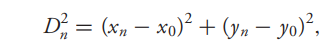

from the ant’s starting position (x0, y0). You may let
the ant move over a preset number of time steps, but do
stop the calculation if the ant reaches the edge of the
lattice.

a. Repeat the above simulation process for 10 distinct
realizations of your percolation lattice, and plot the
ensemble-average rms distance 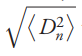
versus iteration count.

b. Repeat all of the above for lattices above and below
the percolation threshold (at p = 0.5 to p = 0.7,
say).

“Normal” diffusion is characterized by a displacement
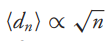 (see appendix C if needed). In which range
of occupation probability p can diffusion be deemed
most “anomalous”?

In [ ]:
def walkingAnt(p, N):
  n_cluster, size_cluster, tag_cluster, map_cluster, biggest_cluster_size, biggest_cluster_tag = create_percolated_lattice(p, N)

  # perform ant movement N_iterations times and paint walked nodes
  N_iterations = int(N**1.8)
  
  #Tag to paint ant path
  # new_tag = 270

  average_displacement_list = np.zeros(N_iterations)
  squared_displacement_list = np.zeros(N_iterations)

  for j in range (10):
    ant_position = [i for i in zip(*np.where(map_cluster == biggest_cluster_tag))]
    ant_position = list(ant_position[np.random.randint(len(ant_position) - 1)])
 
    initial_position = ant_position.copy()

    fim = False
    for i in range(N_iterations):
      # map_cluster[ant_position[0], ant_position[1]] = new_tag

      # 1 = N, 2 = E, 3 = S, 4 = w
      movement = np.random.randint(1, 5)

      if ant_position[0] == 0 or ant_position[0] == N or ant_position[1] == 1 or ant_position[1] == N or fim:
        fim = True

      if movement == 1:
        if map_cluster[ant_position[0] - 1, ant_position[1]] == biggest_cluster_tag: # or map_cluster[ant_position[0] - 1, ant_position[1]] == new_tag:
          ant_position[0] -= 1
          
      elif movement == 2:
        if map_cluster[ant_position[0], ant_position[1] + 1] == biggest_cluster_tag: # or map_cluster[ant_position[0], ant_position[1] + 1] == new_tag:
          ant_position[1] += 1

      elif movement == 3:
        if map_cluster[ant_position[0] + 1, ant_position[1]] == biggest_cluster_tag: # or map_cluster[ant_position[0] + 1, ant_position[1]] == new_tag:
          ant_position[0] += 1
              
      elif movement == 4:
        if map_cluster[ant_position[0], ant_position[1] - 1] == biggest_cluster_tag: # or map_cluster[ant_position[0], ant_position[1] + 1] == new_tag:
          ant_position[1] -= 1

      squared_displacement_list[i] += (ant_position[0] - initial_position[0])**2 + (ant_position[1] - initial_position[1])**2

  average_displacement_list = np.sqrt(squared_displacement_list / 10)

  # Show ant path
  # plt.imshow(map_cluster, cmap=cmap, interpolation="nearest", vmin=0.99)
  # plt.show()

  plt.plot([i for i in range(N_iterations)], average_displacement_list, label = p)
  plt.legend()

def task6(probabilities, n):
  # Reference line
  plt.plot([i for i in range(int(64**1.8))], np.sqrt([i for i in range(int(64**1.8))]))

  for prob in probabilities:
    walkingAnt(prob, n)

# task6([i/10 for i in range (2, 11)], 64)